In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
data.columns = [i.lower().replace(' ', '_') for i in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

In [5]:
data.info

<bound method DataFrame.info of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor    

In [6]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [7]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [8]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
data.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [11]:
cols_num = list(data.select_dtypes(include=['number']).columns)

x = data[cols_num]
x_dis = []
x_con = []

for i in cols_num:
    if x[i].nunique() >= 100:
        x_con.append(i)
    else:
        x_dis.append(i)

x_dis = x.drop(x_con, axis = 1)
x_con = x.drop(x_dis, axis = 1)        

#function to check for continous/discrete values

In [13]:
x_dis.T

,0,1,2,3,4,5,6,7,8,9,...,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133
months_since_last_claim,32,13,18,18,12,14,0,0,13,17,...,31,26,25,6,16,18,14,9,34,3
number_of_open_complaints,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
number_of_policies,1,8,2,7,1,2,9,4,2,8,...,2,2,4,3,1,2,1,2,3,1


In [14]:
x_con.T

,0,1,2,3,4,5,6,7,8,9,...,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133
customer_lifetime_value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575,8256.297800,5380.898636,7216.100311,24127.50402,7388.178085,...,16261.5855,19872.262000,4628.995325,5032.165498,4100.398533,23405.987980,3096.511217,8163.890428,7524.442436,2611.836866
income,56274.000000,0.000000,48767.000000,0.000000,43836.000000,62902.000000,55350.000000,0.000000,14072.00000,28812.000000,...,60646.0000,0.000000,0.000000,66367.000000,47761.000000,71941.000000,21604.000000,0.000000,21941.000000,0.000000
monthly_premium_auto,69.000000,94.000000,108.000000,106.000000,73.000000,69.000000,67.000000,101.000000,71.00000,93.000000,...,134.0000,185.000000,67.000000,64.000000,104.000000,73.000000,79.000000,85.000000,96.000000,77.000000
months_since_policy_inception,5.000000,42.000000,38.000000,65.000000,44.000000,94.000000,13.000000,68.000000,3.00000,7.000000,...,42.0000,35.000000,21.000000,48.000000,58.000000,89.000000,28.000000,37.000000,3.000000,90.000000
total_claim_amount,384.811147,1131.464935,566.472247,529.881344,138.130879,159.383042,321.600000,363.029680,511.20000,425.527834,...,643.2000,1950.725547,482.400000,307.200000,541.282007,198.234764,379.200000,790.784983,691.200000,369.600000


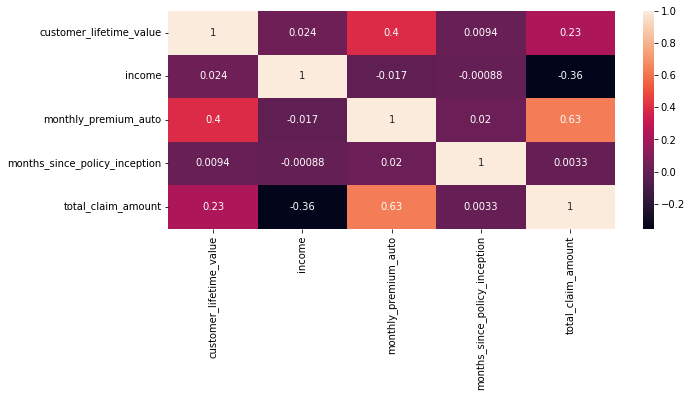

In [16]:
import seaborn as sns
correlations_matrix_continous = x_con.corr()
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlations_matrix_continous, annot=True)
plt.show()

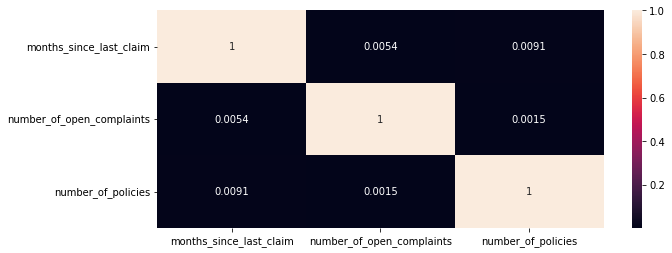

In [17]:
correlations_matrix_discrete = x_dis.corr()
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlations_matrix_discrete, annot=True)
plt.show()

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


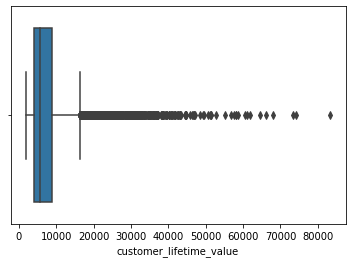

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


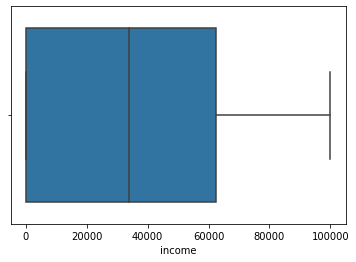

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


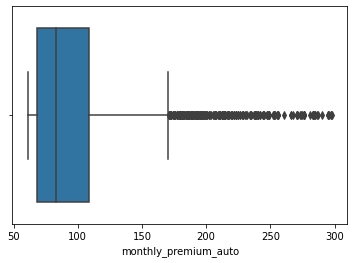

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


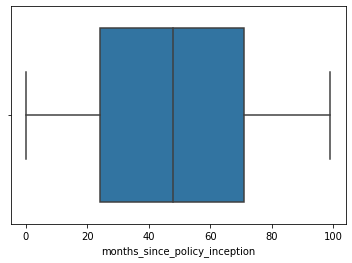

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


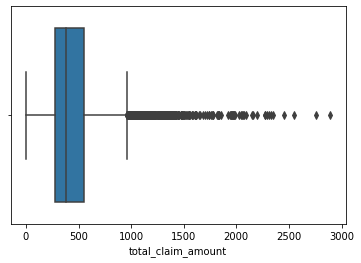

In [19]:
for i in x_con.columns: 
    sns.boxplot(x_con[i])
    plt.show()

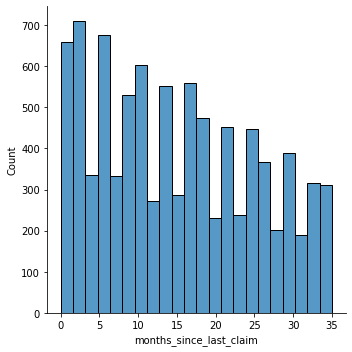

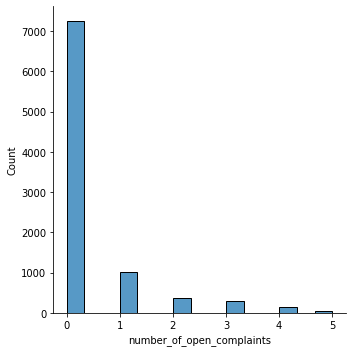

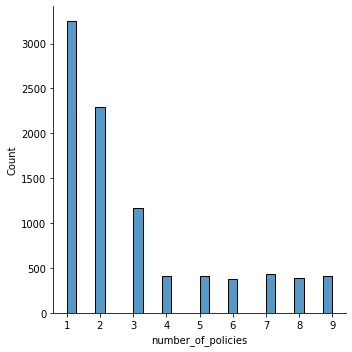

In [21]:
for i in x_dis.columns: 
    sns.displot(x_dis[i])
    plt.show()

In [23]:
categorical_df = data.select_dtypes(object)
categorical_df.head().T

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
location_code,Suburban,Suburban,Suburban,Suburban,Rural
marital_status,Married,Single,Married,Married,Single
policy_type,Corporate Auto,Personal Auto,Personal Auto,Corporate Auto,Personal Auto


In [24]:
categorical_df.isna().sum() # no NaN Values

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [25]:
for col in categorical_df.columns:
    print(col," : ",categorical_df[col].nunique(),categorical_df[col].unique(), )

customer  :  9134 ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state  :  5 ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response  :  2 ['No' 'Yes']
coverage  :  3 ['Basic' 'Extended' 'Premium']
education  :  5 ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus  :  5 ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender  :  2 ['F' 'M']
location_code  :  3 ['Suburban' 'Rural' 'Urban']
marital_status  :  3 ['Married' 'Single' 'Divorced']
policy_type  :  3 ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy  :  9 ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type  :  4 ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel  :  4 ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class  :  6 ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size  :  3 ['Medsize' 'Small' 'Large']


In [26]:
mapping = {'No':0,'Yes':1}
categorical_df = categorical_df.replace({'response': mapping})
mapping2 = {'M':0,'F':1}
categorical_df = categorical_df.replace({'gender': mapping2})

In [27]:
categorical_df[['renew_offer_type']] = categorical_df[['renew_offer_type']].replace('Offer', '', regex=True)
categorical_df[['policy_type']] = categorical_df[['policy_type']].replace('Auto', '', regex=True)
categorical_df[['policy']] = categorical_df[['policy']].replace(r'\D+', '', regex=True).astype('int')
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,0,Basic,Bachelor,Employed,1,Suburban,Married,Corporate,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,0,Extended,Bachelor,Unemployed,1,Suburban,Single,Personal,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,0,Premium,Bachelor,Employed,1,Suburban,Married,Personal,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,0,Basic,Bachelor,Unemployed,0,Suburban,Married,Corporate,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,0,Basic,Bachelor,Employed,0,Rural,Single,Personal,1,1,Agent,Four-Door Car,Medsize


In [29]:
categorical_df = categorical_df.drop(columns = ['customer'])
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,Basic,Bachelor,Employed,1,Suburban,Married,Corporate,3,1,Agent,Two-Door Car,Medsize
1,Arizona,0,Extended,Bachelor,Unemployed,1,Suburban,Single,Personal,3,3,Agent,Four-Door Car,Medsize
2,Nevada,0,Premium,Bachelor,Employed,1,Suburban,Married,Personal,3,1,Agent,Two-Door Car,Medsize
3,California,0,Basic,Bachelor,Unemployed,0,Suburban,Married,Corporate,2,1,Call Center,SUV,Medsize
4,Washington,0,Basic,Bachelor,Employed,0,Rural,Single,Personal,1,1,Agent,Four-Door Car,Medsize


In [30]:
categorical_df_num = categorical_df.drop(columns =['state','education','employmentstatus','location_code','policy_type','sales_channel','vehicle_class','marital_status'])
categorical_df_2 = categorical_df[['state','education','employmentstatus','location_code','policy_type','sales_channel','vehicle_class','marital_status']]
categorical_df_2.head()

,state,education,employmentstatus,location_code,policy_type,sales_channel,vehicle_class,marital_status
0,Washington,Bachelor,Employed,Suburban,Corporate,Agent,Two-Door Car,Married
1,Arizona,Bachelor,Unemployed,Suburban,Personal,Agent,Four-Door Car,Single
2,Nevada,Bachelor,Employed,Suburban,Personal,Agent,Two-Door Car,Married
3,California,Bachelor,Unemployed,Suburban,Corporate,Call Center,SUV,Married
4,Washington,Bachelor,Employed,Rural,Personal,Agent,Four-Door Car,Single


In [31]:
for col in categorical_df_2.columns:
    print(col,": \n",categorical_df_2[col].value_counts(),"\n" )

state : 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

education : 
 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

employmentstatus : 
 Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 

location_code : 
 Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

policy_type : 
 Personal      6788
Corporate     1968
Special        378
Name: policy_type, dtype: int64 

sales_channel : 
 Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64 

vehicle_class : 
 Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehi

In [33]:
categoricals = data.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


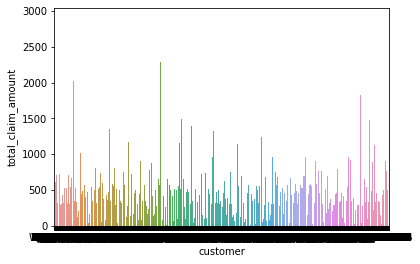

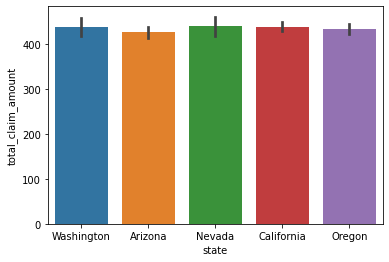

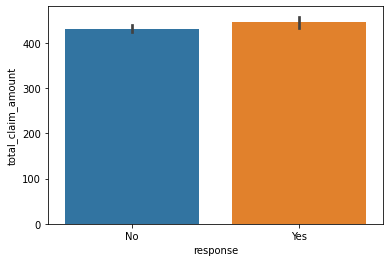

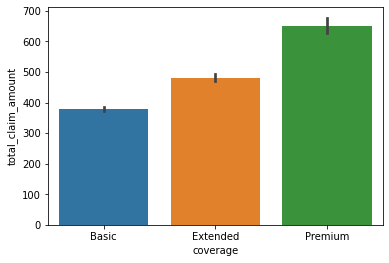

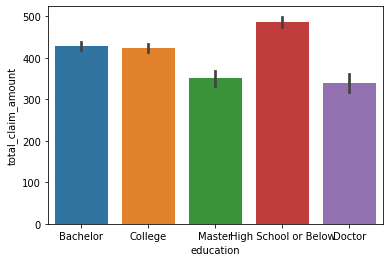

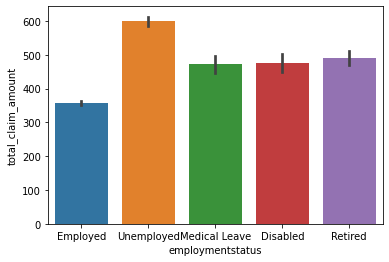

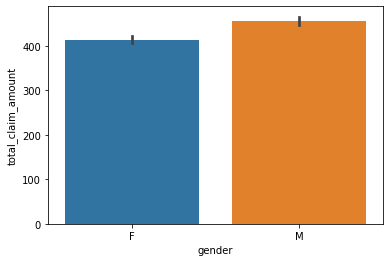

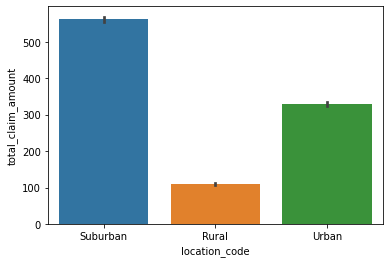

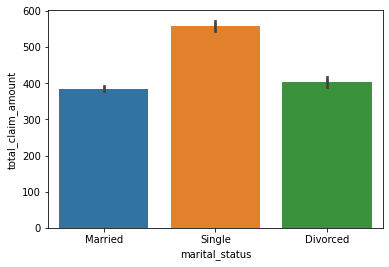

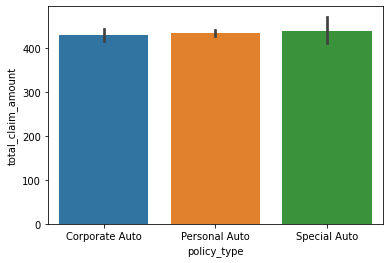

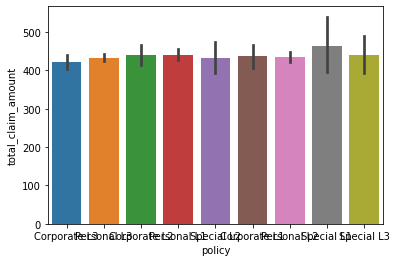

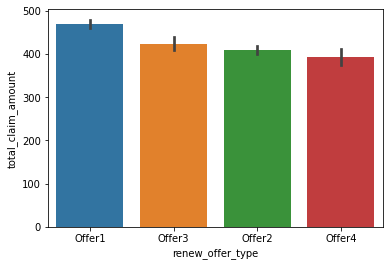

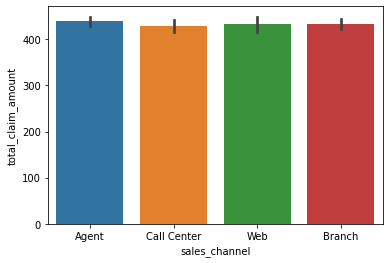

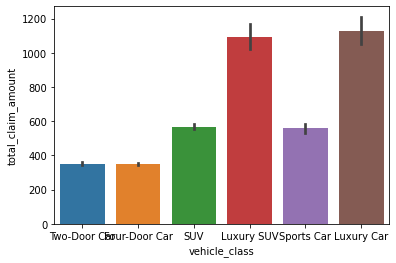

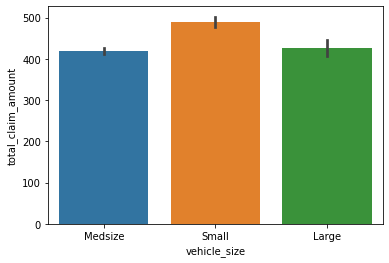

In [34]:
for column in categoricals.columns:
    sns.barplot(x=column, y="total_claim_amount", data=data)
    plt.show()

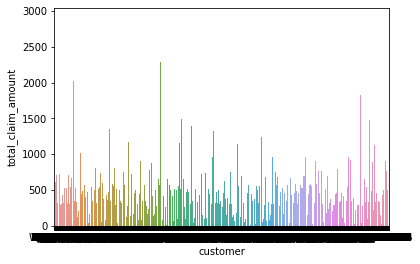

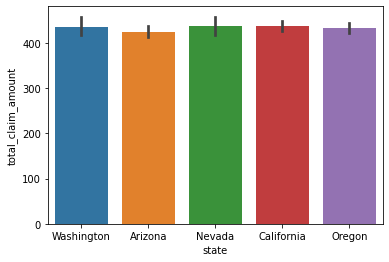

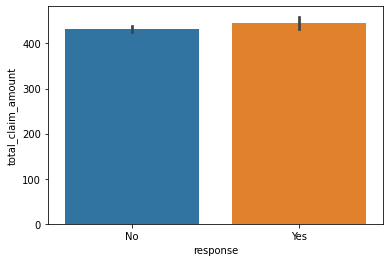

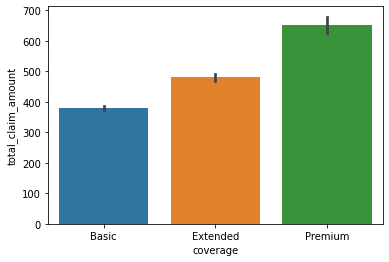

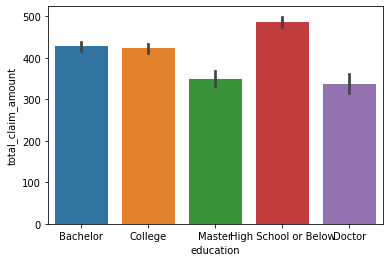

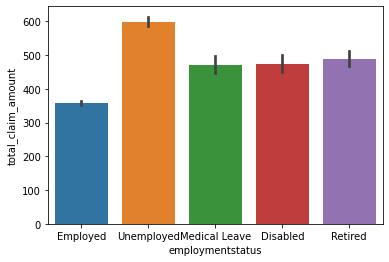

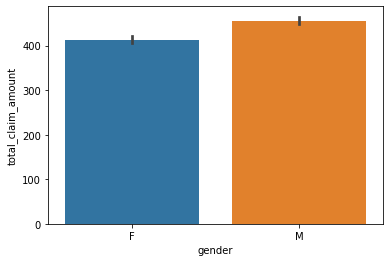

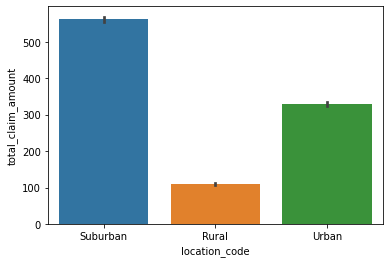

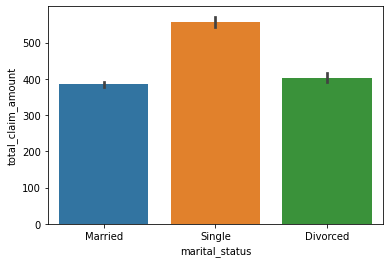

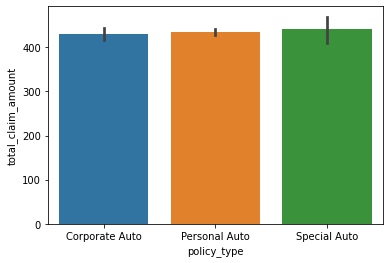

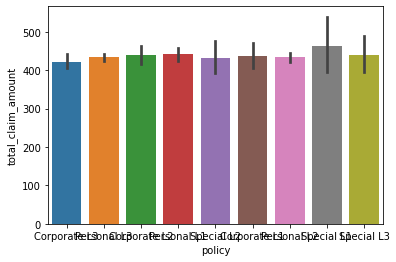

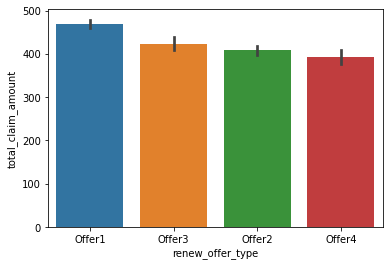

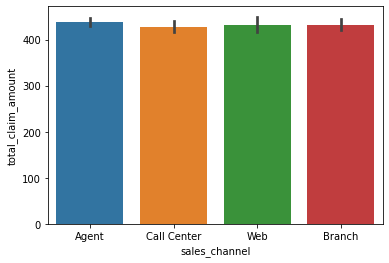

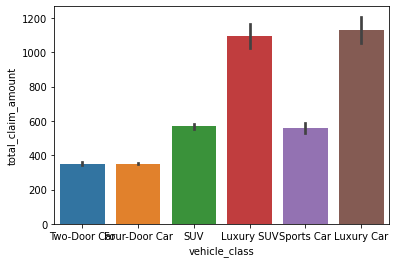

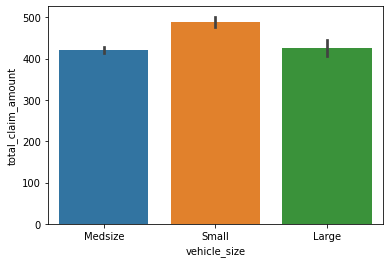

In [35]:
for column in categoricals.columns:
    sns.barplot(x=column, y="total_claim_amount", data=data)
    plt.show()

In [37]:
categoricals_2 = categorical_df_2.select_dtypes(object)
categoricals_2.head()

,state,education,employmentstatus,location_code,policy_type,sales_channel,vehicle_class,marital_status
0,Washington,Bachelor,Employed,Suburban,Corporate,Agent,Two-Door Car,Married
1,Arizona,Bachelor,Unemployed,Suburban,Personal,Agent,Four-Door Car,Single
2,Nevada,Bachelor,Employed,Suburban,Personal,Agent,Two-Door Car,Married
3,California,Bachelor,Unemployed,Suburban,Corporate,Call Center,SUV,Married
4,Washington,Bachelor,Employed,Rural,Personal,Agent,Four-Door Car,Single


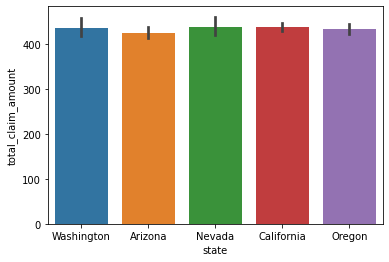

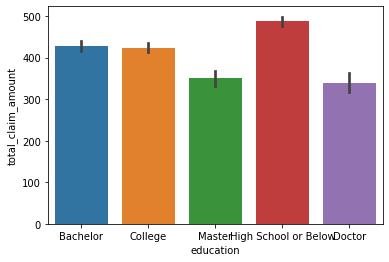

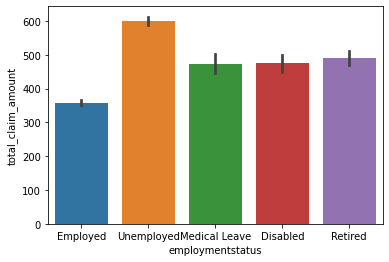

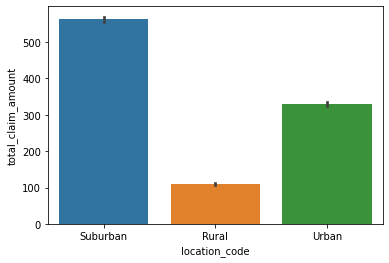

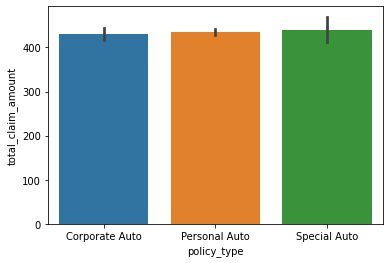

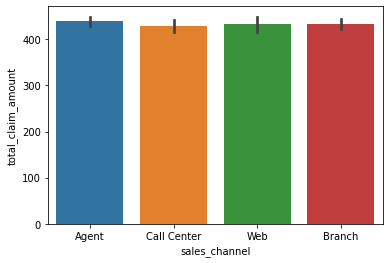

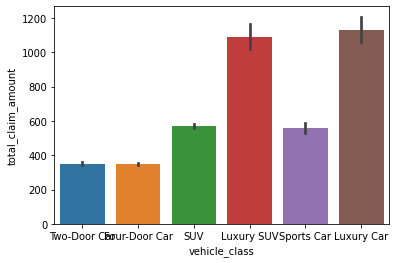

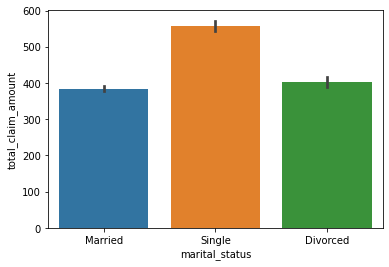

In [40]:
for column in categoricals_2.columns:
    sns.barplot(x=column, y="total_claim_amount", data=data)
    plt.show()

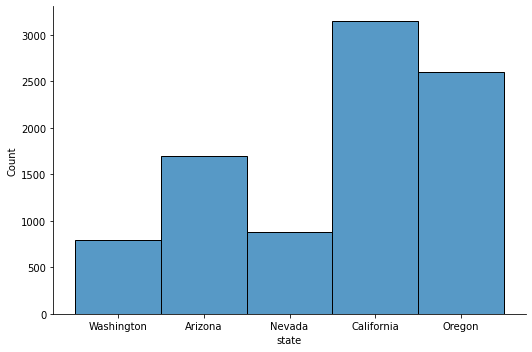

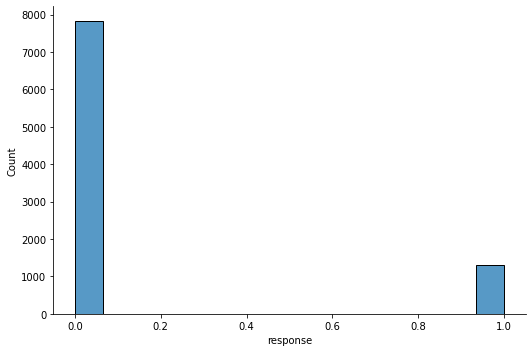

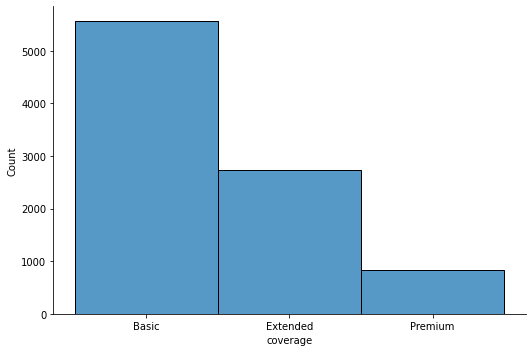

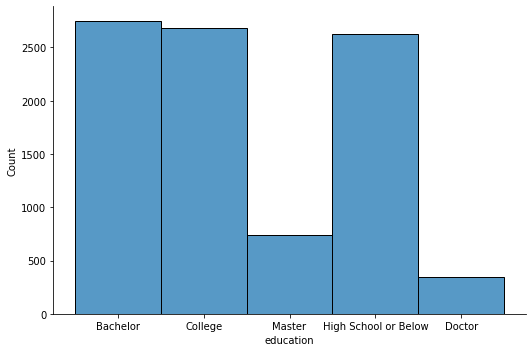

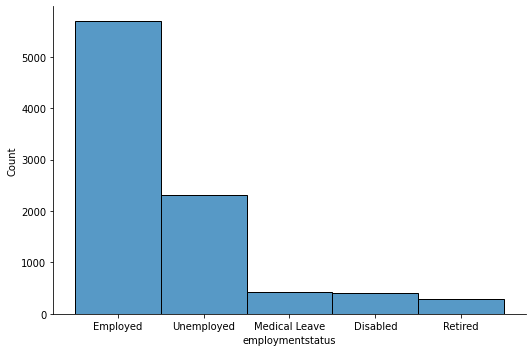

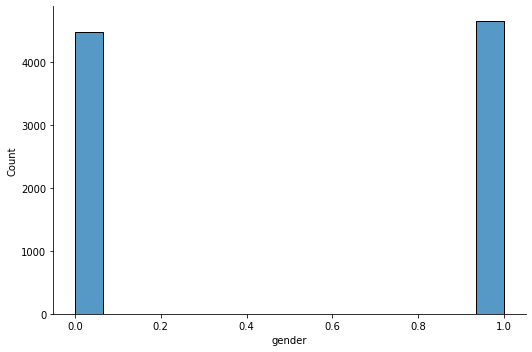

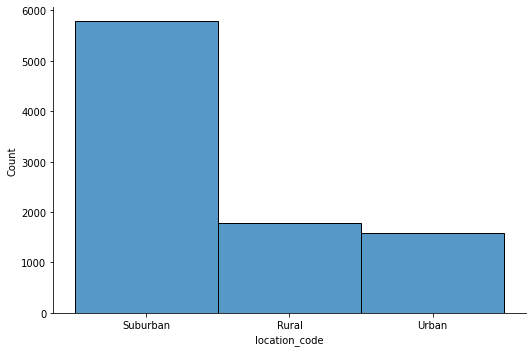

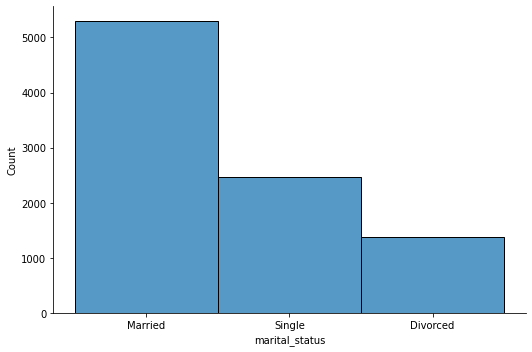

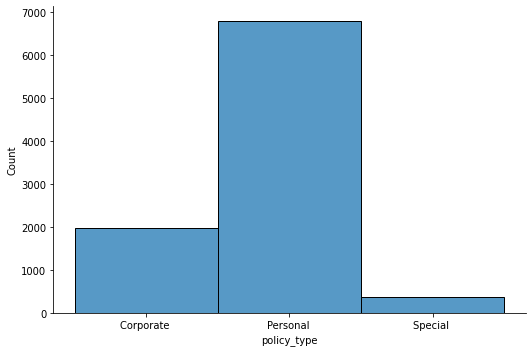

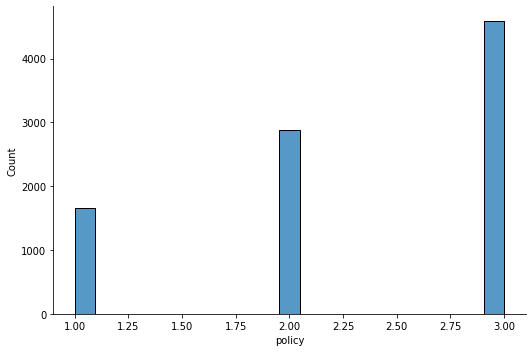

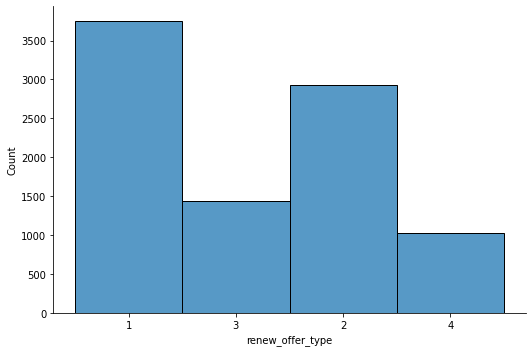

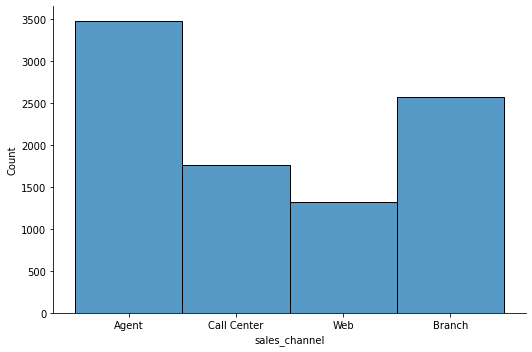

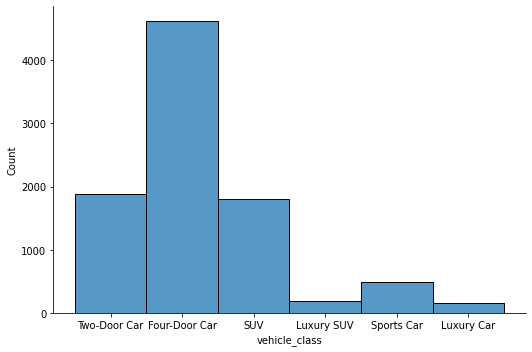

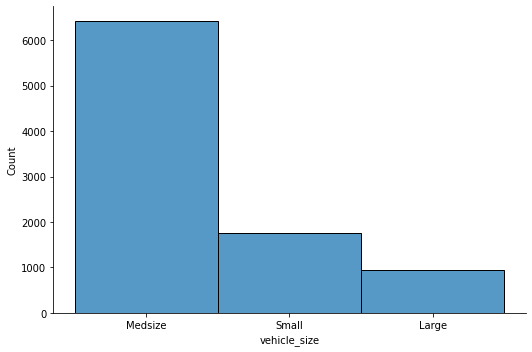

In [49]:
for column in categorical_df.columns:
    
    sns.displot(x=column, data = categorical_df,kind='hist',height=5,aspect=1.5)
    plt.show()

In [50]:
from datetime import date
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [51]:
categorical_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [52]:
# Great! Now define a function that takes a list of models and train 
# (and tests) them so we can try a lot of them without repeating code.

In [55]:
y = x_con['monthly_premium_auto']
x_con.drop(['monthly_premium_auto'], axis=1, inplace=True)
x_con.head()
X = x_con   #x/y split

In [56]:
y.head()

0     69
1     94
2    108
3    106
4     73
Name: monthly_premium_auto, dtype: int64

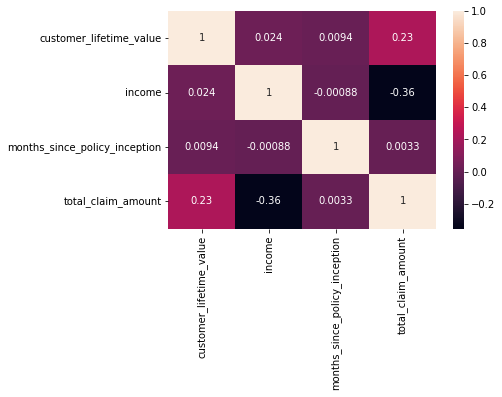

In [57]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

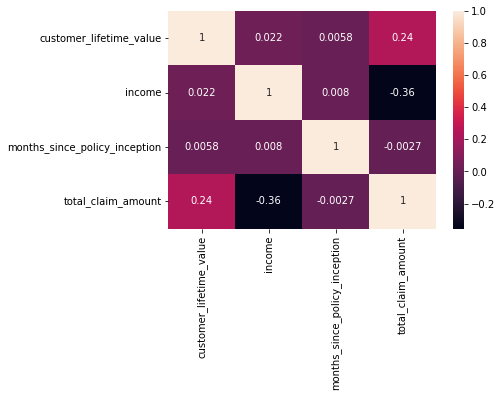

In [59]:
correlations_matrix = X_train.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [60]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()   

#scaling the values in our X

,customer_lifetime_value,income,months_since_policy_inception,total_claim_amount
0,0.866245,-1.237436,1.541061,1.038244
1,0.011557,-0.184303,0.356399,-0.334434
2,-0.735413,-1.237436,1.792352,-0.119362
3,-0.838248,-1.237436,0.751286,-1.106661
4,0.857222,-0.193578,-0.684667,0.126855


In [61]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [62]:
LR = LogisticRegression(random_state=0, solver='lbfgs')  #applying logistic regression model to our data
LR.fit(X_train_scaled, y_train)

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [63]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)  #applying logistic regression model

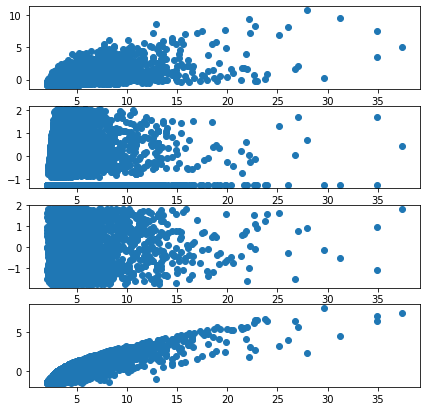

In [64]:
fig, ax = plt.subplots(4, figsize=(7, 7))
ax[0].scatter(logits,X_train_scaled['customer_lifetime_value'])
ax[1].scatter(logits,X_train_scaled['income'])
ax[2].scatter(logits,X_train_scaled['months_since_policy_inception']) 
ax[3].scatter(logits,X_train_scaled['total_claim_amount']) #plot to check for linearity, strong linear

In [66]:
y.value_counts()

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: monthly_premium_auto, Length: 202, dtype: int64

In [67]:
LR.score(X_test_scaled, y_test)  #lr score of 78% because of strong linearity in 2 of our 3 features

0.04597701149425287

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

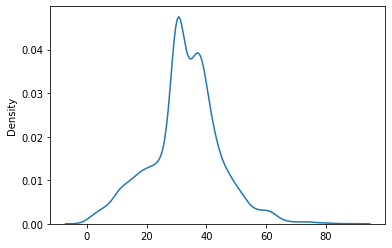

In [76]:
import scipy.stats as stats
transformed_data, best_lambda = stats.boxcox(data['total_claim_amount'])     ## https://statologie.de/box-cox-transformation-python/
sns.distplot(transformed_data, hist=False, kde=True) 